# Урок №7. Домашнее задание.

1. К алгоритму kNN, представленному на уроке, реализуйте добавление весов для соседей по любому из показанных на уроке принципов. Сравните точность нового алгоритма с исходным при разных значениях `k`.

In [1]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

%matplotlib inline

In [2]:
X, y = load_iris(return_X_y=True)

X = X[:, :2]

In [3]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.4, random_state=15)

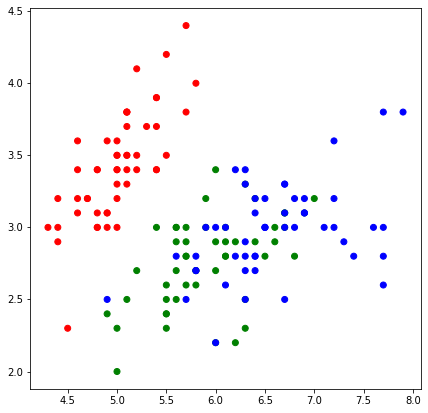

In [4]:
cmap = ListedColormap(['red','green', 'blue'])
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap)
plt.show()

In [5]:
# Евклидова метрика:
def e_metrics(x1, x2):
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    return np.sqrt(distance)

In [6]:
# Алгоритм поиска брижайших соседей
def knn(X_train, y_train, X_test, k):
    
    answers = []
    for X in X_test:
        test_distances = []
        
        for i in range(len(X_train)):
            
            distance = e_metrics(X, X_train[i])
            
            test_distances.append((distance, y_train[i]))
            
        k_neighbours = sorted(test_distances)[0:k]
        
        classes = {class_item: 0 for class_item in set(y_train)}
        
        for d in k_neighbours:
            classes[d[1]] += 1 # вес каждого соседа равен 1
            
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

In [7]:
# Функция вычисления точности
def accuracy(pred, y):
    return (sum(pred == y) / len(y))

In [8]:
k_all = [1, 2, 3, 5, 6, 8, 9, 10, 11, 12]
for k in k_all:
    y_pred = knn(X_train, y_train, X_test, k)
    print(f'Точность алгоритма при k = {k}: {accuracy(y_pred, y_test):.3f}')

Точность алгоритма при k = 1: 0.733
Точность алгоритма при k = 2: 0.717
Точность алгоритма при k = 3: 0.767
Точность алгоритма при k = 5: 0.700
Точность алгоритма при k = 6: 0.733
Точность алгоритма при k = 8: 0.783
Точность алгоритма при k = 9: 0.800
Точность алгоритма при k = 10: 0.800
Точность алгоритма при k = 11: 0.750
Точность алгоритма при k = 12: 0.783


In [9]:
# алгоритм определения соседей с добавлением веса от номера соседа
def knn_w(X_train, y_train, X_test, k):
    
    answers = []
    for X in X_test:
        test_distances = []
        
        for i in range(len(X_train)):
            
            distance = e_metrics(X, X_train[i])
            
            test_distances.append((distance, y_train[i]))
            
        k_neighbours = sorted(test_distances)[0:k]
        
        classes = {class_item: 0 for class_item in set(y_train)}
        
        i = 1
        for d in k_neighbours:
            classes[d[1]] += 1 / ((i + 1) ** 0.5)
            i += 1
            
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

In [10]:
# алгоритм определения соседей с добавлением веса от расстояния до соседа
def knn_d(X_train, y_train, X_test, k):
    
    answers = []
    for X in X_test:
        test_distances = []
        
        for i in range(len(X_train)):
            
            distance = e_metrics(X, X_train[i])
            
            test_distances.append((distance, y_train[i]))
            
        k_neighbours = sorted(test_distances)[0:k]
        
        classes = {class_item: 0 for class_item in set(y_train)}
        
        for d in k_neighbours:
            classes[d[1]] += 1 / (d[0] + 1) ** 2
            
        answers.append(sorted(classes, key=classes.get)[-1])
    return answers

In [11]:
k_all = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]
for k in k_all:
    y_pred = knn(X_train, y_train, X_test, k)
    y_pred_w = knn_w(X_train, y_train, X_test, k)
    y_pred_d = knn_d(X_train, y_train, X_test, k)
    print(f'Точность алгоритма при k = {k}: knn: {accuracy(y_pred, y_test):.3f} '
          f'knn_w: {accuracy(y_pred_w, y_test):.3f}, knn_d: {accuracy(y_pred_d, y_test):.3f}')

Точность алгоритма при k = 1: knn: 0.733 knn_w: 0.733, knn_d: 0.733
Точность алгоритма при k = 2: knn: 0.717 knn_w: 0.733, knn_d: 0.733
Точность алгоритма при k = 3: knn: 0.767 knn_w: 0.767, knn_d: 0.767
Точность алгоритма при k = 4: knn: 0.700 knn_w: 0.767, knn_d: 0.750
Точность алгоритма при k = 5: knn: 0.700 knn_w: 0.700, knn_d: 0.700
Точность алгоритма при k = 6: knn: 0.733 knn_w: 0.733, knn_d: 0.750
Точность алгоритма при k = 7: knn: 0.767 knn_w: 0.733, knn_d: 0.767
Точность алгоритма при k = 8: knn: 0.783 knn_w: 0.800, knn_d: 0.817
Точность алгоритма при k = 9: knn: 0.800 knn_w: 0.767, knn_d: 0.783
Точность алгоритма при k = 10: knn: 0.800 knn_w: 0.767, knn_d: 0.783
Точность алгоритма при k = 11: knn: 0.750 knn_w: 0.767, knn_d: 0.750
Точность алгоритма при k = 12: knn: 0.783 knn_w: 0.750, knn_d: 0.767
Точность алгоритма при k = 13: knn: 0.767 knn_w: 0.767, knn_d: 0.767
Точность алгоритма при k = 14: knn: 0.800 knn_w: 0.767, knn_d: 0.767


Лучше всего себя показывает вес в зависимости от расстояния до соседей: при к=8, точность - 81,7 %

2. (\*) Напишите функцию подсчета метрики качества кластеризации как среднее квадратичное внутрикластерное расстояние и постройте график ее зависимости от количества кластеров `k` (взять от 1 до 10) для выборки данных из данного урока (создать датасет, как в методичке).

In [15]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, random_state=1)

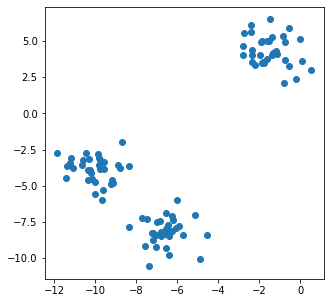

In [16]:
plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1])
plt.show()

In [85]:
def kmeans(data, k, max_iterations, min_distance):
    
    # инициализируем центроиды как первые k элементов датасета
    centroids = [data[i] for i in range(k)]
    
    for i in range(max_iterations):
        # Создадим словарь для классификации
        classes = {i: [] for i in range(k)}
        
        for x in data:
            distances = [e_metrics(x, centroid) for centroid in centroids]

            classification = distances.index(min(distances))
            classes[classification].append(x)

        old_centroids = centroids.copy()

        for classification in classes:
            centroids[classification] = np.average(classes[classification], axis=0)

        optimal = True

        for ind in range(len(centroids)):
            distance = e_metrics(centroids[ind], old_centroids[ind])
            if distance > min_distance:
                optimal = False

        if optimal:
#             print('stop:', i)
            break
        
    return old_centroids, classes

In [38]:
def visualize(centroids, classes):
    colors = ['r', 'g', 'b']
    
    plt.figure(figsize=(6, 6))
    
    # нанесем на график центроиды
    for centroid in centroids:
        plt.scatter(centroid[0], centroid[1], marker='x', s=130, c='black')
        
    # нанесем объекты, раскрашенные по классам
    for class_item in classes:
        for x in classes[class_item]:
            plt.scatter(x[0], x[1], color=colors[class_item], alpha=0.7)
            
    plt.show()

stop: 3


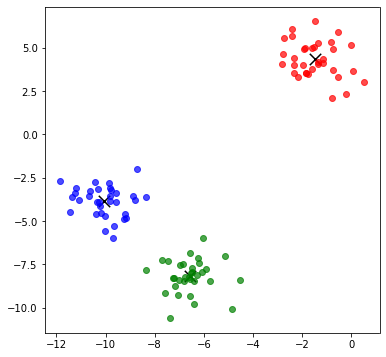

In [84]:
# определим максимальное количество итераций
max_iterations = 8

# сразу определим известное нам количество кластеров
k = 3

# и минимальное расстояние между центроидами до пересчета и после него, при котором нужно остановить алгоритм
min_distance = 1e-4

centroids, clusters = kmeans(X, k, max_iterations, min_distance)

visualize(centroids, clusters)

In [49]:
def e_metrics(x1, x2):
    distance = 0
    for i in range(len(x1)):
        distance += np.square(x1[i] - x2[i])
    return np.sqrt(distance)

[array([-1.4710815 ,  4.33721882]),
 array([-6.67314756, -8.10778035]),
 array([-10.06082976,  -3.79341568])]

In [129]:
def quality(X, k, centroids, clusters):
    quality = 0 # качество разбиения

    for cluster in clusters:
        sum_cluster_quality = 0 # качество одного кластера
        for x in clusters[cluster]:
            sum_cluster_quality += (e_metrics(x, centroids[cluster])) ** 2
        quality += sum_cluster_quality / len(clusters[cluster])
#     print(quality)

    return quality

In [155]:
def quality_print(num_k): # num_k - до какого количества кластеров необходимо нарисовать кривую качества разбиения.
    plt.figure(figsize=(10, 6))
    x, y = [], []
    for k in range(1, num_k + 1):
        centroids, clusters = kmeans(X, k, max_iterations, min_distance)
        print(f'при k={k}: {quality(X, k, centroids, clusters)}')
        x.append(k), y.append(quality(X, k, centroids, clusters))
    plt.plot(x, y, c='red', marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Quality')
    plt.show()

при k=1: 41.1815377770447
при k=2: 10.881849094602703
при k=3: 4.682216258738468
при k=4: 4.834363560848225
при k=5: 4.715237884593066
при k=6: 5.692331738106566
при k=7: 5.48129814571242
при k=8: 5.619563724867451
при k=9: 5.91545920542921
при k=10: 5.696782421502369
при k=11: 5.69487808313954
при k=12: 5.538421595953724
при k=13: 5.6924432818497355
при k=14: 5.799620520475508
при k=15: 5.44465822335948


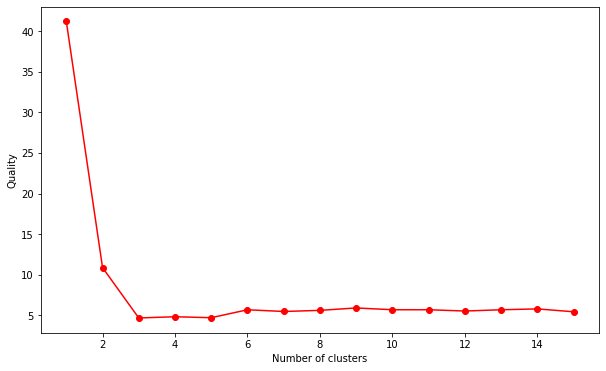

In [154]:
quality_print(15)

Исходя из графика видно, что лучший результат при количестве кластеров k = 3.